## 第3题

### 初始化

In [361]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体（适用于中文）
plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号
plt.style.use('fivethirtyeight')  # 设置绘图风格

m, n = 100, 20
np.random.seed(0)
A = np.random.randn(m, n)

# Define the function f and its gradient
def f(x):
    Ax = A @ x
    return np.sum(np.exp(Ax) + np.exp(-Ax))

def grad_f(x):
    Ax = A @ x
    return A.T @ (np.exp(Ax) - np.exp(-Ax))

# Gradient descent with backtracking
def gradient_descent_backtracking(alpha, beta, eta=1e-4, max_iter=1000):
    x = np.ones(n)
    f_values = []
    step_sizes = []
    for _ in range(max_iter):
        grad = grad_f(x)
        norm_grad = np.linalg.norm(grad)
        if norm_grad <= eta:
            break
        t = 1.0
        while f(x - t * grad) > f(x) - alpha * t * norm_grad**2:
            t *= beta
        x = x - t * grad
        f_values.append(f(x))
        step_sizes.append(t)
    return f_values, step_sizes, len(f_values)

# Try different combinations of alpha and beta
alphas = [0.01, 0.1, 0.3, 0.49]
betas = np.array(range(1, 10)) / 10.0
results = {}

### 求解

In [362]:
for alpha in alphas:
    for beta in betas:
        f_vals, steps, iters = gradient_descent_backtracking(alpha, beta)
        results[(alpha, beta)] = (f_vals, steps, iters)

C:\Users\jnli02\AppData\Local\Temp\ipykernel_21724\3423022429.py:15: RuntimeWarning: overflow encountered in exp
  return np.sum(np.exp(Ax) + np.exp(-Ax))


### 画图

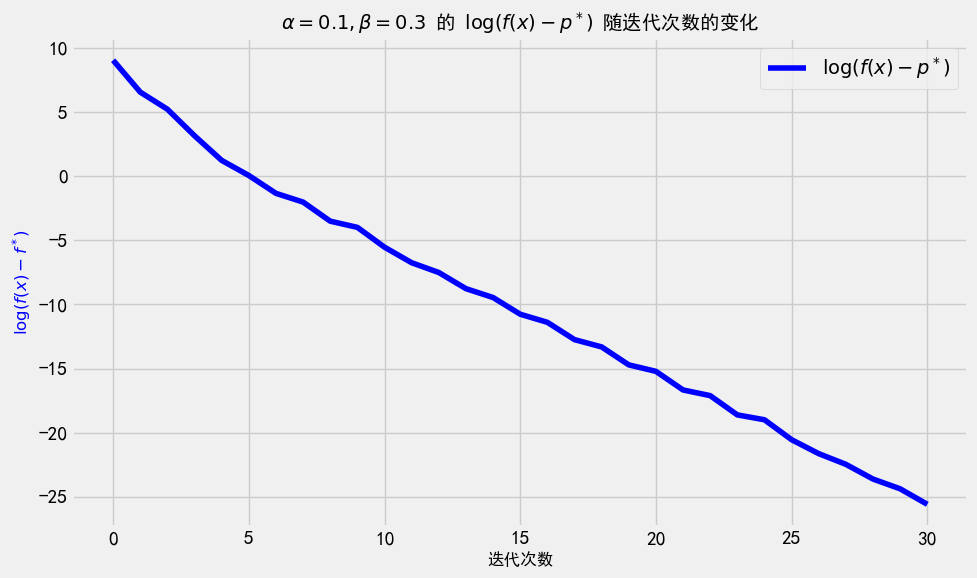

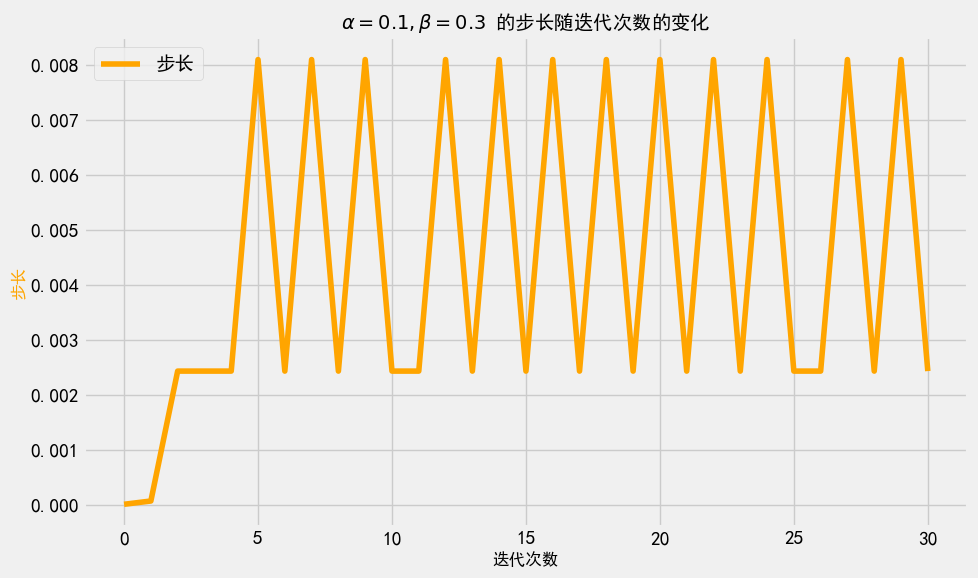

In [363]:
# 提取 alpha=0.1, beta=0.3 的结果
alpha_beta_key = (0.1, 0.3)
f_vals_alpha_beta, steps_alpha_beta, _ = results[alpha_beta_key]

# 计算 log(f(x) - f*)
log_fx_minus_f_star = np.log(np.array(f_vals_alpha_beta) - f_star)

# 绘制 log(f(x) - f*) 随迭代次数的变化
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(log_fx_minus_f_star, label=r'$\log(f(x) - p^*)$', color='blue')
ax1.set_xlabel('迭代次数', fontsize=12)
ax1.set_ylabel(r'$\log(f(x) - f^*)$', fontsize=12, color='blue')
ax1.set_title(r'$\alpha=0.1, \beta=0.3$ 的 $\log(f(x) - p^*)$ 随迭代次数的变化', fontsize=14)
ax1.legend()
plt.tight_layout()
plt.show()

# 绘制步长随迭代次数的变化
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(steps_alpha_beta, label='步长', color='orange')
ax2.set_xlabel('迭代次数', fontsize=12)
ax2.set_ylabel('步长', fontsize=12, color='orange')
ax2.set_title(r'$\alpha=0.1, \beta=0.3$ 的步长随迭代次数的变化', fontsize=14)
ax2.legend()
plt.tight_layout()
plt.show()

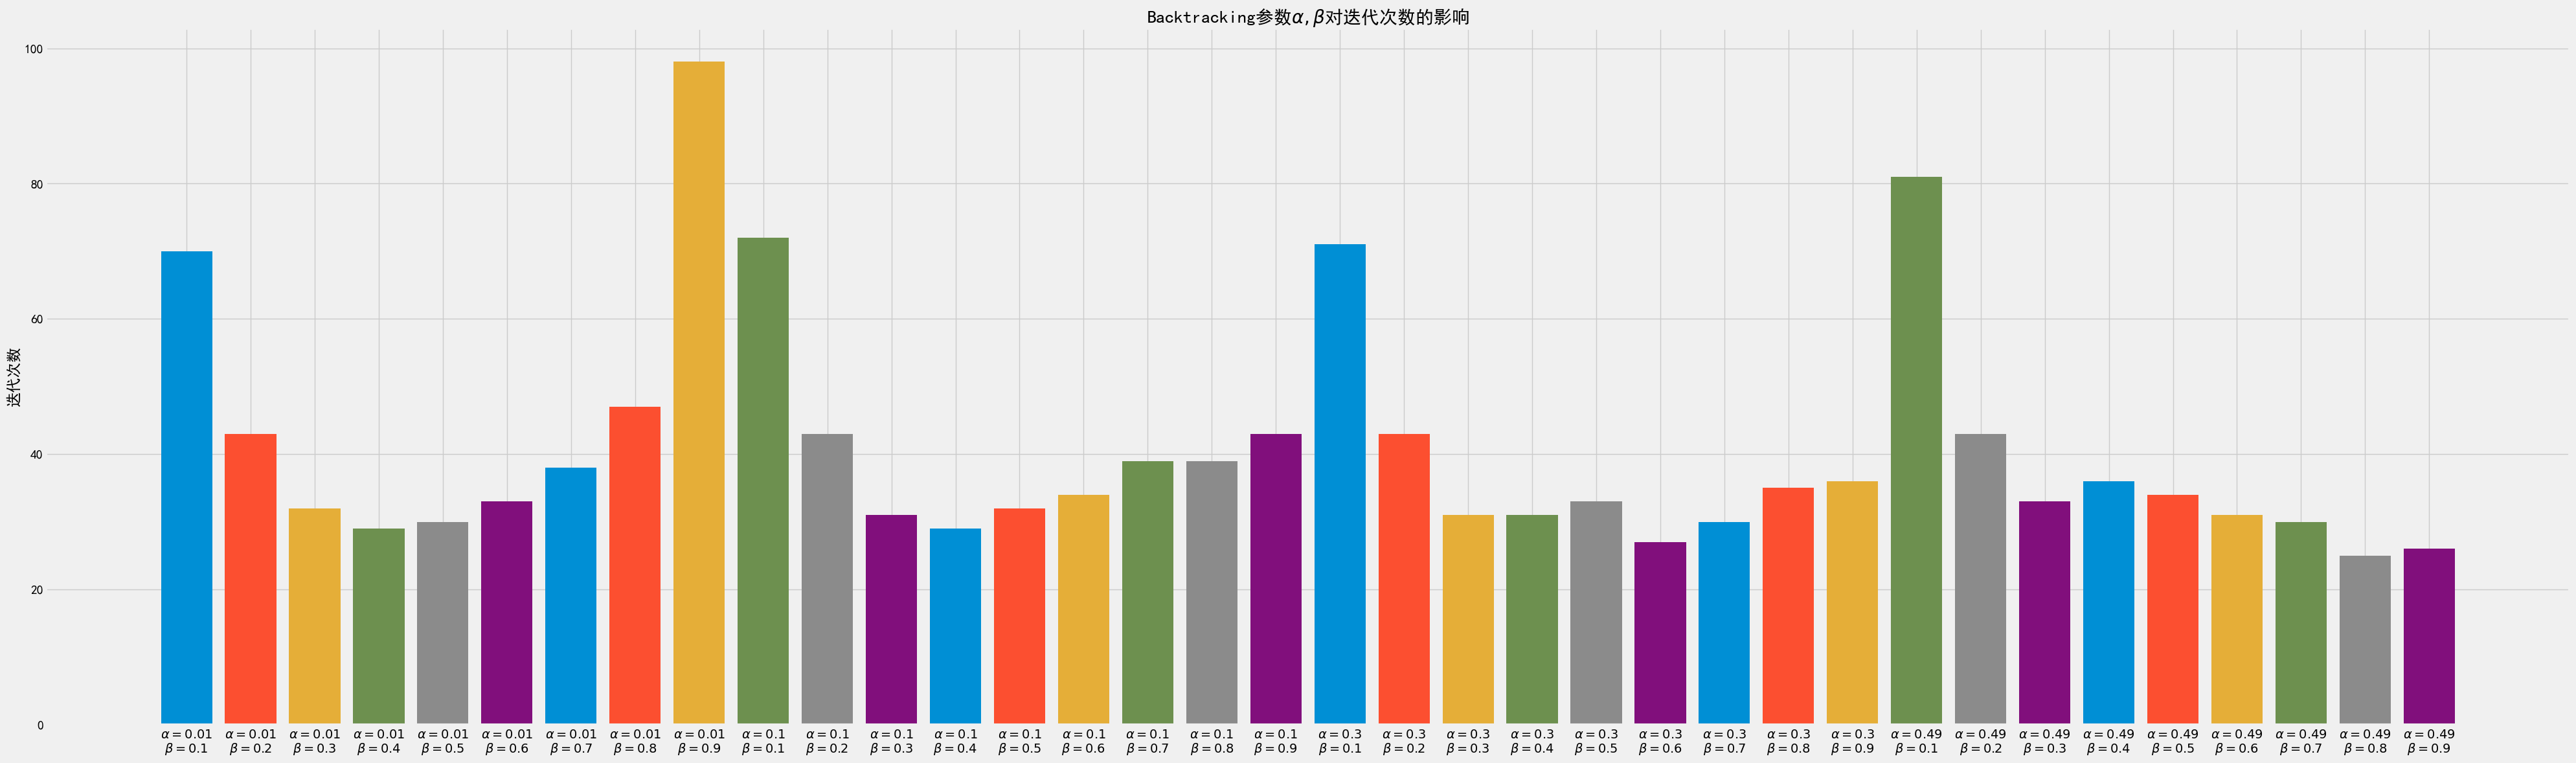

In [364]:
# Plot iteration counts for different (alpha, beta) combinations
fig, ax = plt.subplots(figsize=(40, 12))
xticks = []
for (alpha, beta), (_, _, iters) in results.items():
    if iters < 1000:  # 只显示迭代次数小于1000的结果
        label = rf"$\alpha={alpha}$" + "\n" + rf"$\beta={beta}$"
        xticks.append(label)
        ax.bar(label, iters)
ax.set_xticks(xticks)
ax.set_ylabel("迭代次数")
ax.set_title(r"Backtracking参数$\alpha, \beta$对迭代次数的影响")
plt.tight_layout()
plt.show()


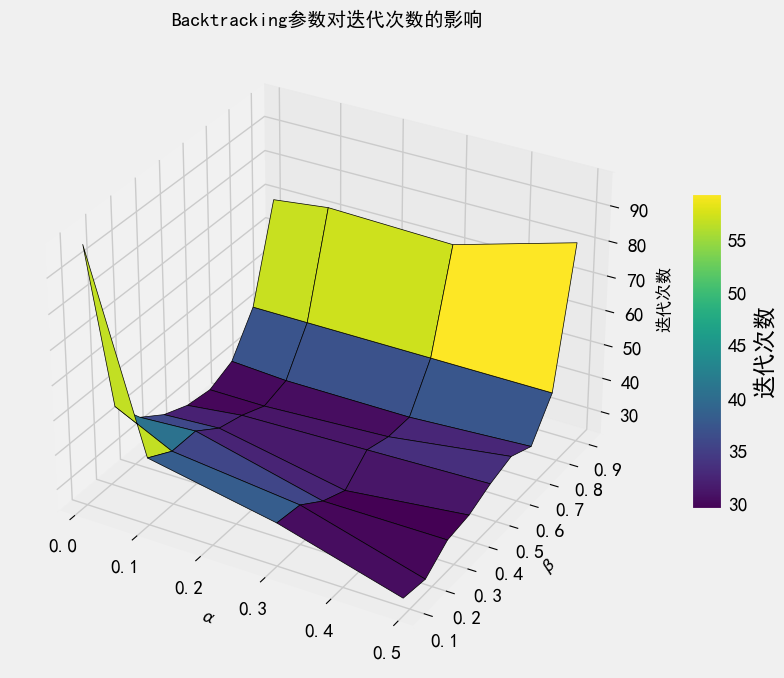

In [365]:
from mpl_toolkits.mplot3d import Axes3D
# 生成网格和迭代次数矩阵
alpha_grid, beta_grid = np.meshgrid(alphas, betas)
iteration_grid = np.array([[results[(a, b)][2] for a in alphas] for b in betas])

# 创建三维图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(alpha_grid, beta_grid[::-1], iteration_grid, cmap='viridis', edgecolor='k')

# 添加标签
ax.set_title('Backtracking参数对迭代次数的影响', fontsize=14)
ax.set_xlabel(r'$\alpha$', fontsize=12)
ax.set_ylabel(r'$\beta$', fontsize=12)
ax.set_zlabel('迭代次数', fontsize=12, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=10, label="迭代次数")

plt.tight_layout()
plt.show()

## 第4题

### 初始化

In [366]:
def steepest_descent_linf(alpha=0.3, beta=0.8, eta=1e-4, max_iter=1000):
    x = np.ones(n)
    f_values = []
    step_sizes = []
    for _ in range(max_iter):
        grad = grad_f(x)
        norm_grad = np.linalg.norm(grad)
        if norm_grad <= eta:
            break
        # Steepest descent direction in L∞ norm: -sign(∇f)
        d = -np.sign(grad)
        

        # Backtracking line search
        t = 1.0
        while f(x + t * d) > f(x) + alpha * t * grad @ d:
            t *= beta

        x = x + t * d
        f_values.append(f(x))
        step_sizes.append(t)
    return f_values, step_sizes, len(f_values)

### 求解

In [367]:
for alpha in alphas:
    for beta in betas:
        f_vals, steps, iters = steepest_descent_linf(alpha, beta)
        results[(alpha, beta)] = (f_vals, steps, iters)

### 画图

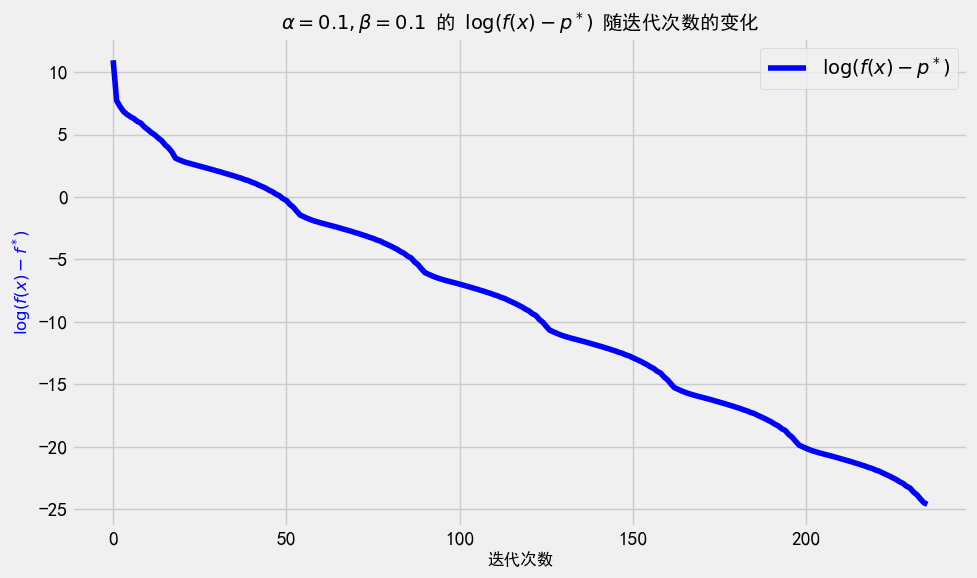

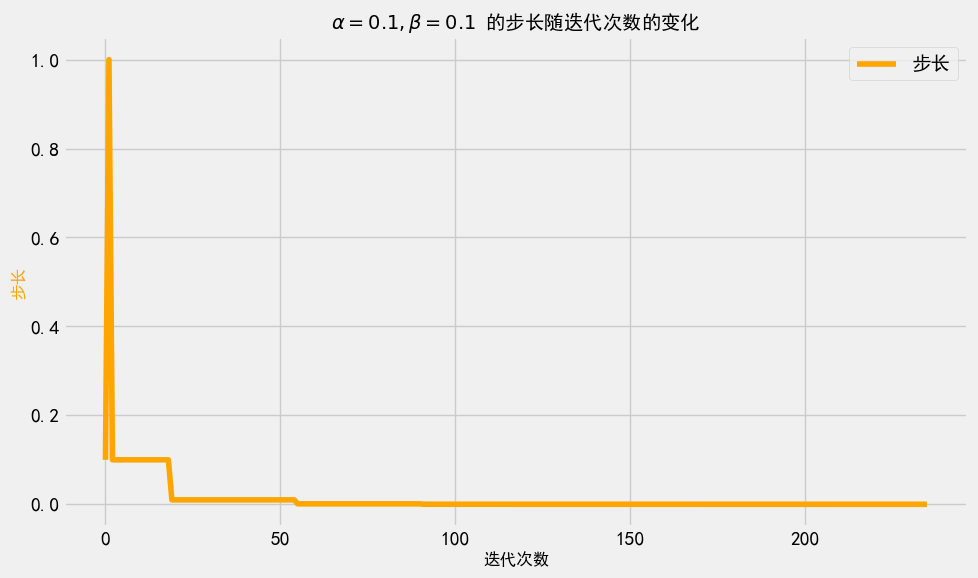

In [368]:
# 提取 alpha=0.1, beta=0.3 的结果
alpha_beta_key = (0.1, 0.1)
f_vals_alpha_beta, steps_alpha_beta, _ = results[alpha_beta_key]

# 计算 log(f(x) - f*)
log_fx_minus_f_star = np.log(np.array(f_vals_alpha_beta) - f_star)

# 绘制 log(f(x) - f*) 随迭代次数的变化
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(log_fx_minus_f_star, label=r'$\log(f(x) - p^*)$', color='blue')
ax1.set_xlabel('迭代次数', fontsize=12)
ax1.set_ylabel(r'$\log(f(x) - f^*)$', fontsize=12, color='blue')
ax1.set_title(r'$\alpha=0.1, \beta=0.1$ 的 $\log(f(x) - p^*)$ 随迭代次数的变化', fontsize=14)
ax1.legend()
plt.tight_layout()
plt.show()

# 绘制步长随迭代次数的变化
fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(steps_alpha_beta, label='步长', color='orange')
ax2.set_xlabel('迭代次数', fontsize=12)
ax2.set_ylabel('步长', fontsize=12, color='orange')
ax2.set_title(r'$\alpha=0.1, \beta=0.1$ 的步长随迭代次数的变化', fontsize=14)
ax2.legend()
plt.tight_layout()
plt.show()

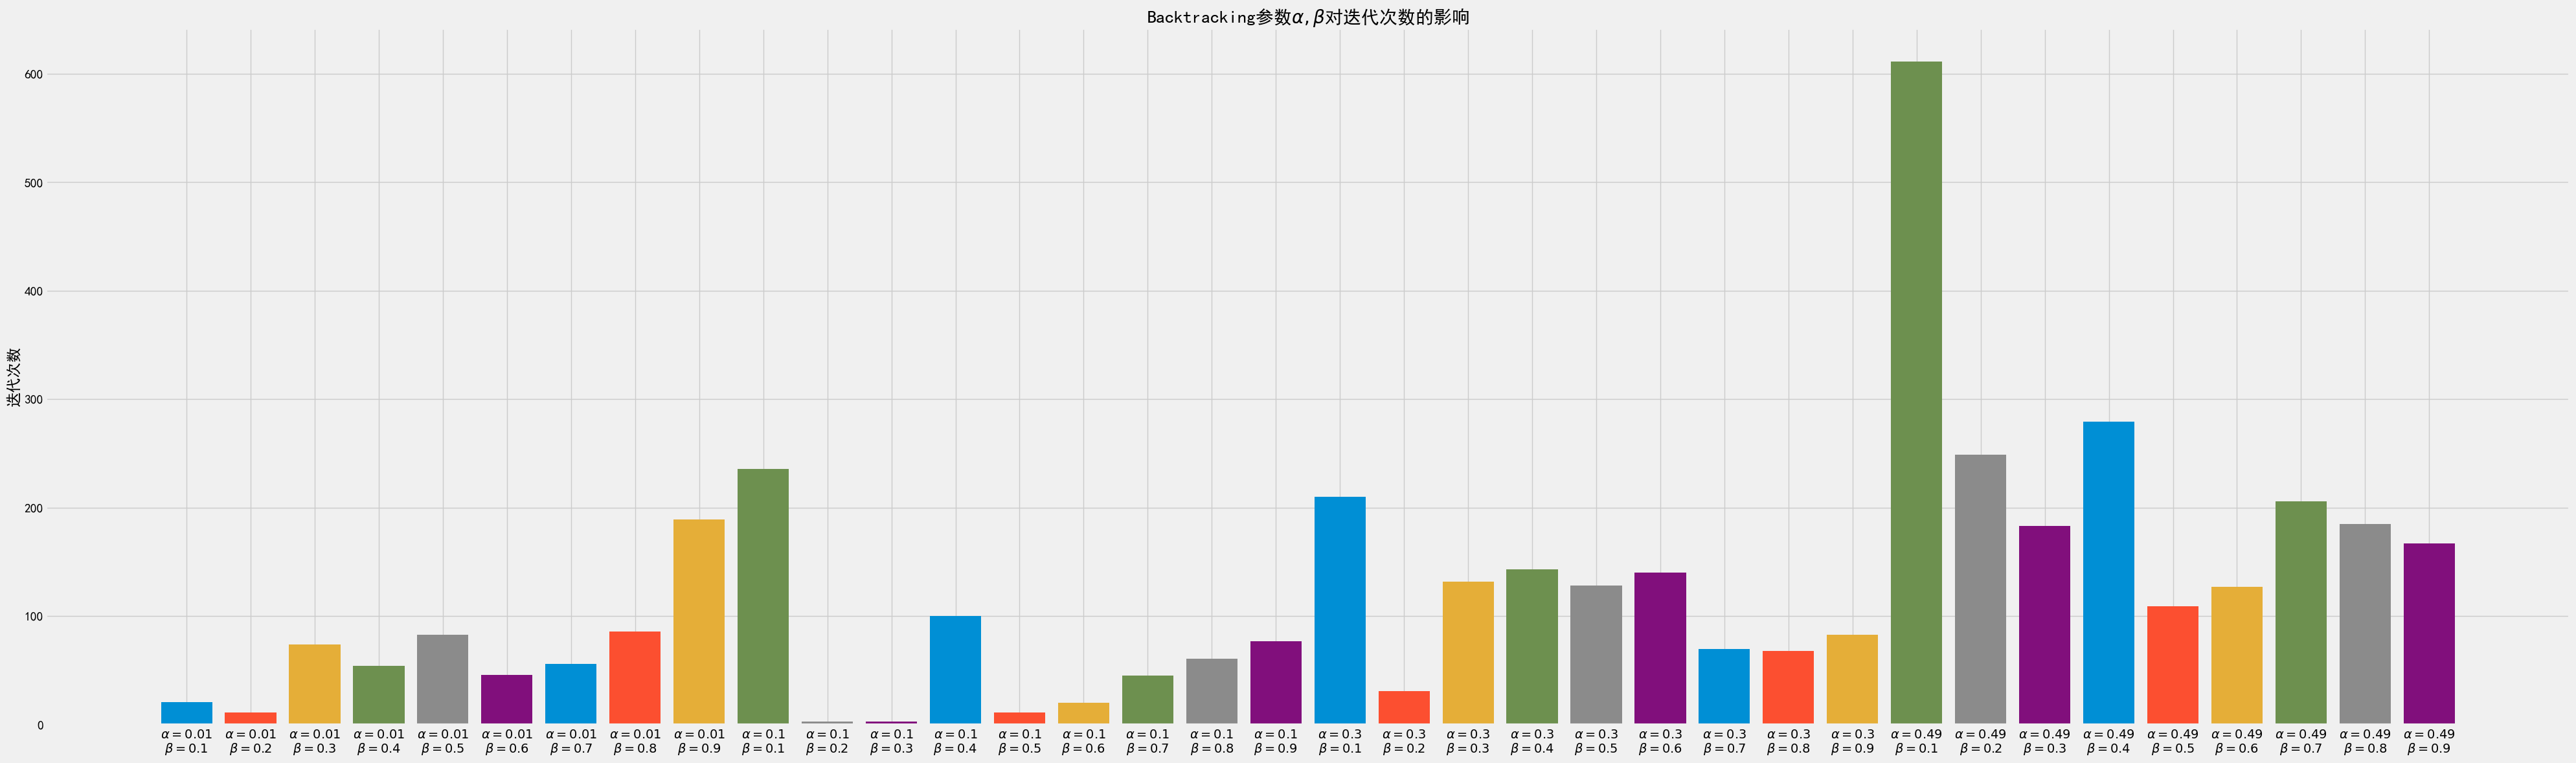

In [369]:
# Plot iteration counts for different (alpha, beta) combinations
fig, ax = plt.subplots(figsize=(40, 12))
xticks = []
for (alpha, beta), (_, _, iters) in results.items():
    if iters < 1000:  # 只显示迭代次数小于1000的结果
        label = rf"$\alpha={alpha}$" + "\n" + rf"$\beta={beta}$"
        xticks.append(label)
        ax.bar(label, iters)
ax.set_xticks(xticks)
ax.set_ylabel("迭代次数")
ax.set_title(r"Backtracking参数$\alpha, \beta$对迭代次数的影响")
plt.tight_layout()
plt.show()


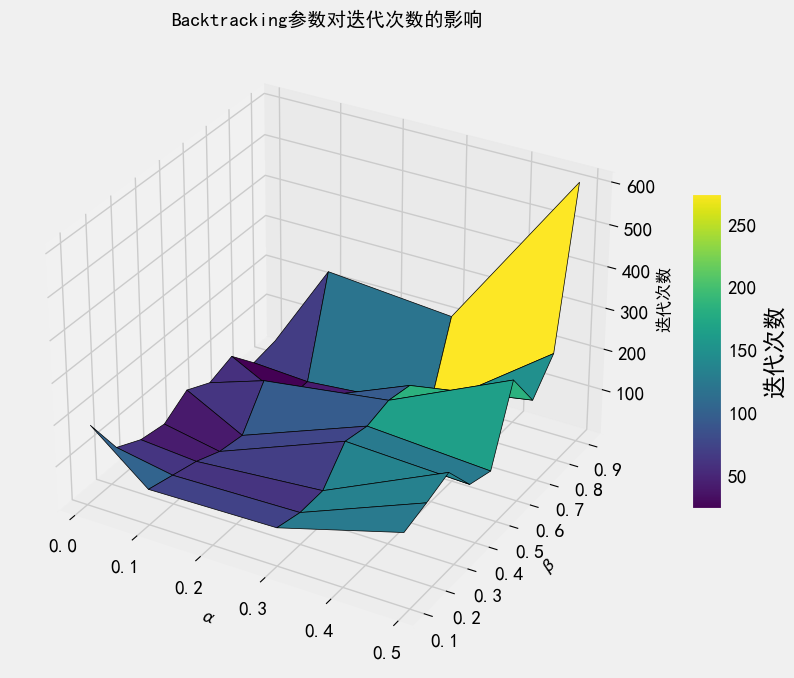

In [370]:
from mpl_toolkits.mplot3d import Axes3D
# 生成网格和迭代次数矩阵
alpha_grid, beta_grid = np.meshgrid(alphas, betas)
iteration_grid = np.array([[results[(a, b)][2] for a in alphas] for b in betas])

# 创建三维图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(alpha_grid, beta_grid[::-1], iteration_grid, cmap='viridis', edgecolor='k')

# 添加标签
ax.set_title('Backtracking参数对迭代次数的影响', fontsize=14)
ax.set_xlabel(r'$\alpha$', fontsize=12)
ax.set_ylabel(r'$\beta$', fontsize=12)
ax.set_zlabel('迭代次数', fontsize=12, rotation=90)
fig.colorbar(surf, shrink=0.5, aspect=10, label="迭代次数")

plt.tight_layout()
plt.show()

## 第5题

### 初始化

In [371]:
import time
# Rosenbrock function and gradient
def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def grad_f(x):
    dfdx0 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    dfdx1 = 200 * (x[1] - x[0]**2)
    return np.array([dfdx0, dfdx1])

def hessian_f(x):
    d2f_dx0x0 = 1200 * x[0]**2 - 400 * x[1] + 2
    d2f_dx0x1 = -400 * x[0]
    d2f_dx1x1 = 200
    return np.array([[d2f_dx0x0, d2f_dx0x1], [d2f_dx0x1, d2f_dx1x1]])

### Damped Newton method

In [372]:
# Damped Newton method
def damped_newton(x0, tol=1e-5, alpha=0.3, beta=0.5):
    x = x0.copy()
    f_vals, times = [f(x)], [0]
    start_time = time.time()
    while np.linalg.norm(grad_f(x)) > tol:
        g = grad_f(x)
        H = hessian_f(x)
        d = -np.linalg.solve(H, g)
        t = 1.0
        while f(x + t * d) > f(x) + alpha * t * g @ d:
            t *= beta
        x += t * d
        f_vals.append(np.log(f(x)))
        times.append(time.time() - start_time)
    return x, f_vals, times

### Gauss-Newton method

In [373]:
# Gauss-Newton method for Rosenbrock: approximate Hessian using J^T J
# r1 = 10(x1^2 - x2), r2 = (1 - x1)
# f = r1^2 + r2^2

def r(x):
    return np.array([10 * (x[0]**2 - x[1]), 1 - x[0]])

def J(x):
    return np.array([[20 * x[0], -10], [-1, 0]])

def gauss_newton(x0, tol=1e-5):
    x = x0.copy()
    f_vals, times = [f(x)], [0]
    start_time = time.time()
    while np.linalg.norm(grad_f(x)) > tol:
        jac = J(x)
        residual = r(x)
        g = jac.T @ residual
        H_approx = jac.T @ jac
        d = -np.linalg.solve(H_approx, g)
        x += d
        f_vals.append(np.log(f(x)))
        times.append(time.time() - start_time)
    return x, f_vals, times

### 求解和画图

In [374]:
x0 = np.array([-2.0, 2.0])
sol_newton, logs_newton, times_newton = damped_newton(x0)
sol_gn, logs_gn, times_gn = gauss_newton(x0)
sol_newton, sol_gn

(array([0.99999999, 0.99999997]), array([1., 1.]))

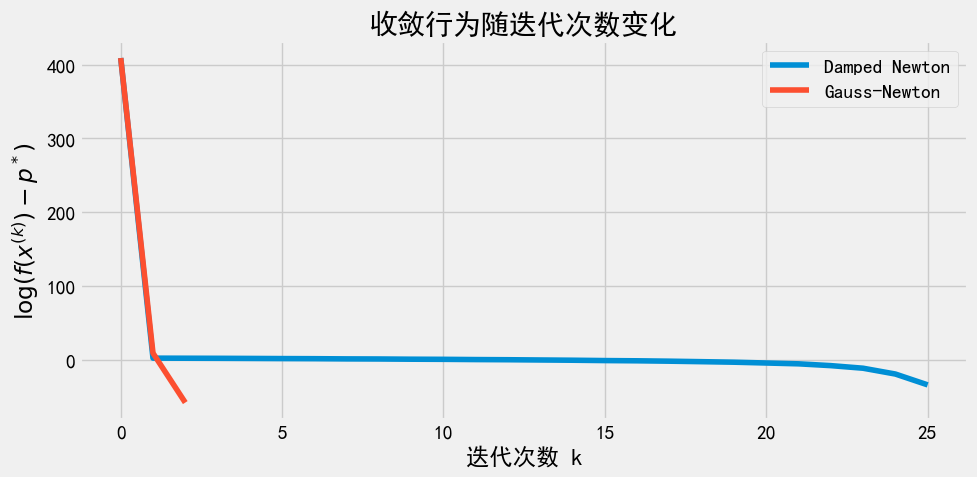

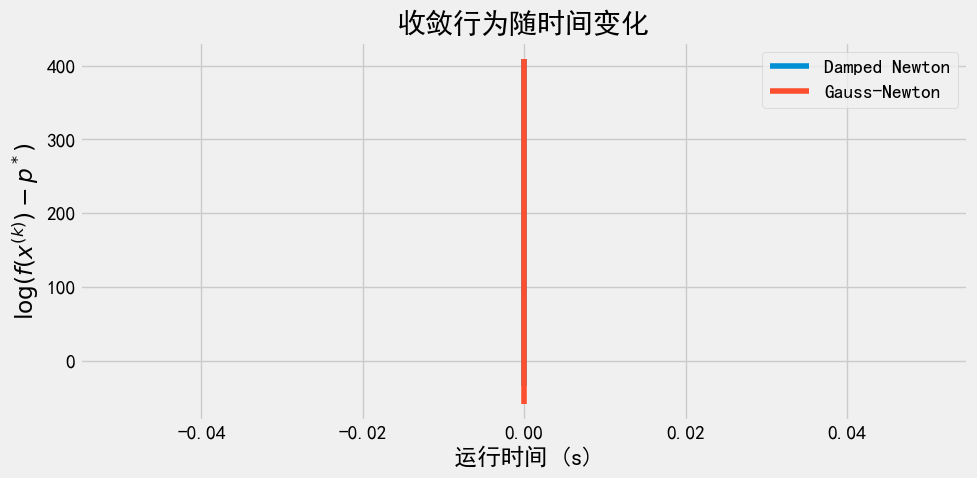

Damped Newton 总迭代次数: 25
Damped Newton 总时间: 0.000000 秒
Gauss-Newton 总迭代次数: 2
Gauss-Newton 总时间: 0.000000 秒


In [375]:
# Plotting
k1 = range(len(logs_newton))
k2 = range(len(logs_gn))

plt.figure(figsize=(10, 5))
plt.plot(k1, logs_newton, label='Damped Newton')
plt.plot(k2, logs_gn, label='Gauss-Newton')
plt.xlabel('迭代次数 k')
plt.ylabel(r'$\log(f(x^{(k)}) - p^*)$')
plt.title('收敛行为随迭代次数变化')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(times_newton, logs_newton, label='Damped Newton')
plt.plot(times_gn, logs_gn, label='Gauss-Newton')
plt.xlabel('运行时间 (s)')
plt.ylabel(r'$\log(f(x^{(k)}) - p^*)$')
plt.title('收敛行为随时间变化')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Damped Newton 总迭代次数: {len(logs_newton) - 1}")
print(f"Damped Newton 总时间: {times_newton[-1]:.6f} 秒")
print(f"Gauss-Newton 总迭代次数: {len(logs_gn) - 1}")
print(f"Gauss-Newton 总时间: {times_gn[-1]:.6f} 秒")


## 第8题

### 初始化

In [376]:
def extended_rosenbrock(x, alpha=100.0):
    """
    扩展 Rosenbrock 函数: f(x) = sum_{i=1}^{n/2} [ alpha*( x_{2i} - x_{2i-1}^2 )^2 + (1 - x_{2i-1})^2 ].
    参数:
        x: (n, ) numpy 数组，n 为偶数
        alpha: Rosenbrock 中的 alpha 参数
    返回:
        f(x) 的标量值
    """
    n = len(x)
    assert n % 2 == 0, "n必须是偶数"
    f_val = 0.0
    for i in range(0, n, 2):
        term1 = x[i+1] - x[i]**2
        term2 = 1 - x[i]
        f_val += alpha * (term1**2) + (term2**2)
    return f_val

def grad_extended_rosenbrock(x, alpha=100.0):
    """
    扩展 Rosenbrock 函数的梯度向量
    """
    n = len(x)
    grad = np.zeros_like(x)
    for i in range(0, n, 2):
        # x_{2i-1} -> x[i], x_{2i} -> x[i+1]
        term1 = x[i+1] - x[i]**2
        term2 = 1 - x[i]
        grad[i]   = -4 * alpha * x[i] * term1 - 2 * term2
        grad[i+1] =  2 * alpha * term1
    return grad

### 下降算法

In [377]:
def line_search(x, d, f, grad_f, alpha=100.0, c=0.3, beta=0.5, max_iter=20):
    """
    简易 backtracking line search:
    试 t=1, 不断乘 beta, 直到满足 Armijo 条件或迭代结束.
    """
    t = 1.0
    fx = f(x, alpha)
    g = grad_f(x, alpha)
    for _ in range(max_iter):
        while f(x + t*d, alpha) > fx + c*t*np.dot(g, d):
            t *= beta        
    return t

def conjugate_gradient(x0, f, grad_f, alpha=100.0, beta_method='FR', tol=1e-6, max_iter=20000):
    """
    共轭梯度法:
      x0: 初始点
      f, grad_f: 目标函数和梯度函数
      alpha: Rosenbrock函数中的参数
      beta_method: 'FR' (Fletcher-Reeves), 'PR' (Polak-Ribiere), 'HS' (Hestenes-Stiefel)
      tol: 终止阈值 (||grad|| < tol)
      max_iter: 最大迭代次数
    返回:
      x: 最终解
      fs: 每次迭代的函数值 list
      gn: 每次迭代的梯度范数 list
      run_time: 算法总耗时
    """
    start_time = time.time()
    x = x0.copy()
    g = grad_f(x, alpha)
    d = -g
    fs = [f(x, alpha)]
    gn = [np.linalg.norm(g)]
    for k in range(max_iter):
        if gn[-1] < tol:
            break
        # 1. 计算步长 t_k
        t_k = line_search(x, d, f, grad_f, alpha=alpha)
        # 2. 更新 x
        x = x + t_k * d
        # 3. 更新梯度
        g_new = grad_f(x, alpha)
        # 4. 计算 beta_k
        if beta_method == 'FR':
            beta_k = np.dot(g_new, g_new) / max(1e-15, np.dot(g, g))
        elif beta_method == 'PR':
            beta_k = np.dot(g_new, g_new - g) / max(1e-15, np.dot(g, g))
        elif beta_method == 'HS':
            diff = g_new - g
            beta_k = np.dot(g_new, diff) / max(1e-15, np.dot(d, diff))
        # 5. 更新方向
        d = -g_new + beta_k * d
        # 6. 准备下次迭代
        g = g_new
        fs.append(f(x, alpha))
        gn.append(np.linalg.norm(g_new))
    run_time = time.time() - start_time
    return x, fs, gn, run_time


### 求解

Beta = FR, 迭代次数 = 157, 最后一次梯度范数 = 5.03e-07, 耗时 = 0.1679s
最终函数值 = 2.543799e-13
----
Beta = PR, 迭代次数 = 130, 最后一次梯度范数 = 2.94e-07, 耗时 = 0.1380s
最终函数值 = 1.904983e-16
----
Beta = HS, 迭代次数 = 68, 最后一次梯度范数 = 6.67e-07, 耗时 = 0.0813s
最终函数值 = 8.087385e-17
----


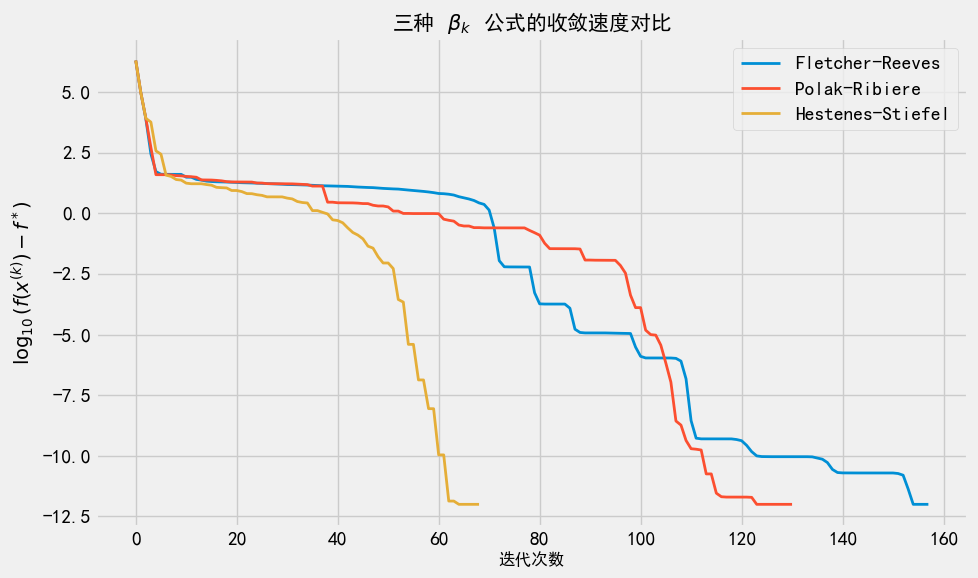

In [378]:
n = 100
x0 = -1.0 * np.ones(n)
np.random.seed(42)

def alphatest(alpha_param):
    fs = {}
    for beta_m in ['FR','PR','HS']:
        x_sol, fs[beta_m], gn_list, t_used = conjugate_gradient(
            x0, extended_rosenbrock, grad_extended_rosenbrock,
            alpha=alpha_param, beta_method=beta_m, tol=1e-6
        )
        print(f"Beta = {beta_m}, 迭代次数 = {len(fs[beta_m])-1}, 最后一次梯度范数 = {gn_list[-1]:.2e}, 耗时 = {t_used:.4f}s")
        print(f"最终函数值 = {fs[beta_m][-1]:.6e}")
        print("----")
    epsilon = 1e-12
    f_star = 0.0
    log_gap_FR = np.log10([max(f - f_star, epsilon) for f in fs["FR"]])
    log_gap_PR = np.log10([max(f - f_star, epsilon) for f in fs["PR"]])
    log_gap_HS = np.log10([max(f - f_star, epsilon) for f in fs["HS"]])

    # 绘图
    plt.figure(figsize=(10, 6))
    plt.plot(log_gap_FR, label="Fletcher-Reeves", linewidth=2)
    plt.plot(log_gap_PR, label="Polak-Ribiere", linewidth=2)
    plt.plot(log_gap_HS, label="Hestenes-Stiefel", linewidth=2)
    plt.xlabel("迭代次数", fontsize=12)
    plt.ylabel(r"$\log_{10}(f(x^{(k)}) - f^*)$", fontsize=14)
    plt.title("三种 $\\,\\beta_k\\,$ 公式的收敛速度对比", fontsize=15)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

alphatest(10000.0)

Beta = FR, 迭代次数 = 137, 最后一次梯度范数 = 8.37e-07, 耗时 = 0.1183s
最终函数值 = 7.337970e-13
----
Beta = PR, 迭代次数 = 58, 最后一次梯度范数 = 1.85e-07, 耗时 = 0.0530s
最终函数值 = 3.368456e-14
----
Beta = HS, 迭代次数 = 33, 最后一次梯度范数 = 7.78e-08, 耗时 = 0.0307s
最终函数值 = 2.119861e-16
----


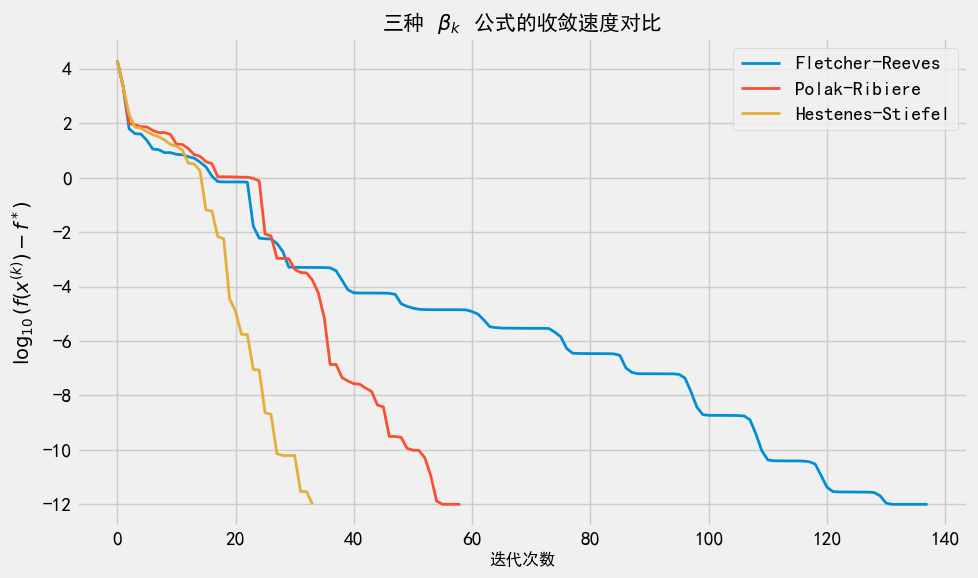

In [379]:

alphatest(100.0)


Beta = FR, 迭代次数 = 34, 最后一次梯度范数 = 6.93e-07, 耗时 = 0.0256s
最终函数值 = 6.951736e-13
----
Beta = PR, 迭代次数 = 31, 最后一次梯度范数 = 6.82e-07, 耗时 = 0.0233s
最终函数值 = 3.626547e-14
----
Beta = HS, 迭代次数 = 30, 最后一次梯度范数 = 4.10e-07, 耗时 = 0.0163s
最终函数值 = 7.845438e-14
----


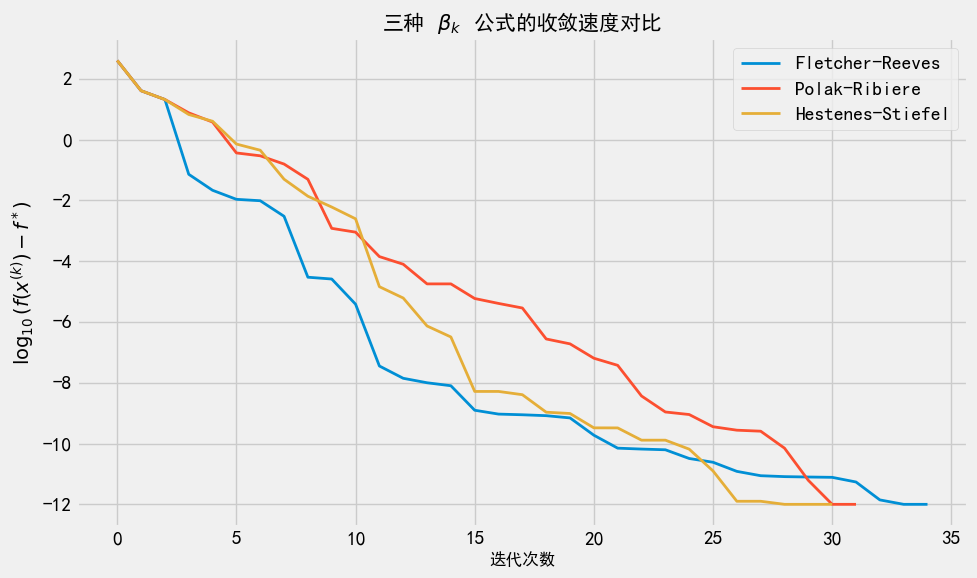

In [380]:
alphatest(1.0)